In [1]:
# import the data set and do the data preprocessing

In [3]:
#Problem statement
#Develop a sentiment analysis model to classify reiviews as positive or negative. 
#Preprocess the review text using techniques such as lower casing, removing stop words and lematization
#use the trained model accurately predict the sentiment of new , unseen reviews.

In [5]:
import pandas as pd

In [7]:
data = pd.read_csv('Reviews.csv')

In [9]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [11]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [13]:
#we can review the top 5 rows
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [15]:
#Top 10 rows
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [17]:
data.tail() # last 5 rows

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [21]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [23]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [27]:
combined_text = " ".join(data['Review']) #combine all review text into one string

In [29]:
wordcloud = WordCloud(width=800 ,height = 400 ,background_color = 'white').generate(combined_text)

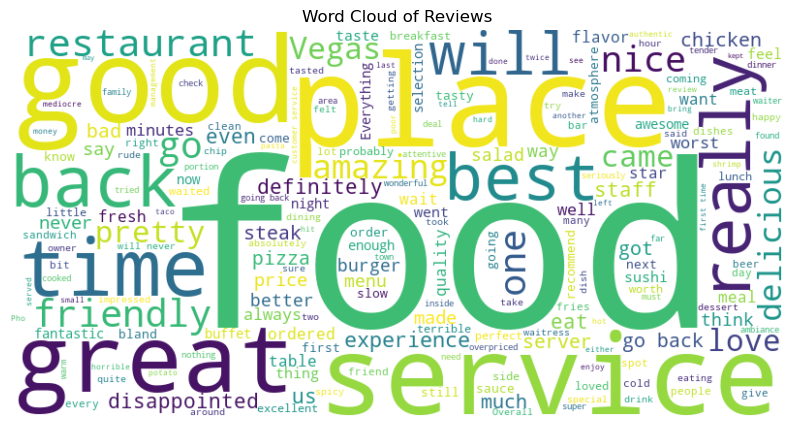

In [31]:
#plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [33]:
from collections import Counter

In [35]:
targeted_words = ['good','great','amazing','bad']

In [37]:
all_words = " ".join(data['Review']).lower().split() #flatten reviews into a single list of words

In [39]:
word_counts = Counter(all_words)
target_word_count = {word: word_counts[word] for word in targeted_words}

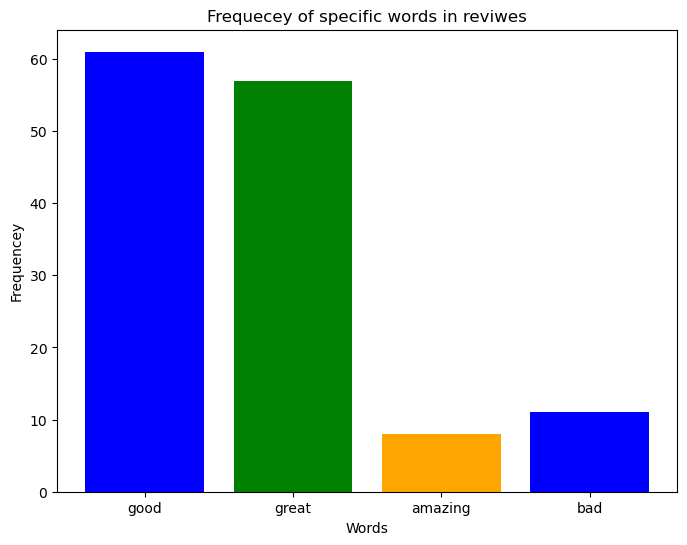

In [43]:
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values(), color=['blue', 'green', 'orange','blue'])
plt.xlabel('Words')
plt.ylabel('Frequencey')
plt.title('Frequecey of specific words in reviwes')
plt.show()

In [45]:
lowercased_text = data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [55]:
import nltk


In [65]:
nltk.data.path.append(r'C:\Users\banda\OneDrive\Desktop\NLTK')



In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\banda\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [75]:
#tokinization
from nltk.tokenize import word_tokenize

In [77]:

data['Tokens'] = data['Review'].apply(word_tokenize)

In [87]:
print(data['Tokens'])


0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [91]:
data['Review'].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [93]:
import string

In [95]:
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)

In [97]:
print(data['Review'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [99]:
data['Review'].value_counts()

Review
 NAME                                                                                                                                     4
I would not recommend this place                                                                                                          2
I love this place                                                                                                                         2
I won t be back                                                                                                                           2
Will not be back                                                                                                                          2
                                                                                                                                         ..
The burger    I got the  Gold Standard  a  17 burger and was kind of disappointed                                                         1
OMG  the food

In [101]:
#Removing the stop words like this, is , are ,was 
from nltk.corpus import stopwords

In [103]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\banda\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [105]:
stop_words = set(stopwords.words('english'))

In [107]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [109]:
print(data['Tokens'])

0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                           [Not, tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                  [The, selection, menu, great, prices]
                             ...                        
995           [I, think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997             [Overall, I, impressed, would, go, back]
998    [The, whole, experience, underwhelming, I, thi...
999    [Then, I, wasted, enough, life, poured, salt, ...
Name: Tokens, Length: 1000, dtype: object


In [111]:
#stemming
#stemming is the process of reducing the a word into root or base word form by removig suffix 
#example : driving stemmed is drive

In [113]:
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [115]:
stemmer = PorterStemmer()

In [117]:
data['stemmed'] = data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [119]:
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [121]:
#Lemmatization
#Lemmatization is the process transforming a word into its base or dictionary form
#example is better is lemmtized to good 

In [137]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\banda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [145]:
# Import necessary modules
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Ensure you have the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\banda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\banda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [147]:
data['Lemmatized'] = data['Review'].apply(lambda x :' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))

In [149]:
print(data['Lemmatized'])

0                                   Wow Loved this place
1                                      Crust be not good
2                Not tasty and the texture be just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                                Appetite instantly go
997       Overall I be not impress and would not go back
998    The whole experience be underwhelming and I th...
999    Then as if I hadn t waste enough of my life th...
Name: Lemmatized, Length: 1000, dtype: object


In [151]:
#Removing the numbers from reviews
import re
data['No_Numbers'] = data['Review'].apply(lambda x : re.sub(r'\d+',' ' ,x))

In [153]:
print(data['No_Numbers'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [155]:
#removing special characters like @ # %,*
data['cleaned'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','' ,x))

In [157]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [159]:
#expanding method
# don't eat food in this hotel , when we apply expanted text it will convert into do not eat food in this hotel

In [161]:
pip install contractions

   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/289.9 kB 660.6 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/289.9 kB 656.4 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/289.9 kB 655.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/289.9 kB 598.8 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/289.9 kB 655.8 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/289.9 kB 811.5 kB/s eta 0:00:01
   --------------------------------- ---- 256.0/289.9 kB 830.3 kB/s eta 0:00:01
   ------------------------------------ - 276.5/289.9 kB 741.6 kB/s eta 0:00:01
   -------------------------------------- 289.9/289.9 kB 717.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [163]:
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)

In [165]:
print(data['Expanded'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Expanded, Length: 1000, dtype: object


In [167]:
#Removing emojis
!pip install emoji

   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
    --------------------------------------- 10.2/590.6 kB ? eta -:--:--
   ---- ---------------------------------- 71.7/590.6 kB 491.5 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/590.6 kB 722.1 kB/s eta 0:00:01
   ----------- -------------------------- 174.1/590.6 kB 807.1 kB/s eta 0:00:01
   --------------------- ------------------ 317.4/590.6 kB 1.2 MB/s eta 0:00:01
   --------------------------- ------------ 399.4/590.6 kB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 399.4/590.6 kB 1.4 MB/s eta 0:00:01
   ------------------------------- -------- 471.0/590.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  583.7/590.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 590.6/590.6 kB 1.3 MB/s eta 0:00:00


In [169]:
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)

In [171]:
print(data['emoji'])


0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [173]:
# removing liks from review_ text
# food is good vist www.abchotel.in

In [175]:
!pip install beautifulsoup

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\banda\AppData\Local\Temp\pip-install-qxvl5lvu\beautifulsoup_7dd0aab8225b4c71915a9b4fd6e4664d\setup.py", line 3
      "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                     ^^
  SyntaxError: invalid syntax
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not 

In [177]:
from bs4 import BeautifulSoup

In [179]:
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())

In [181]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [183]:
#Tf-IDF vectorizer
#TF-term frequency,IDF-Inverse document Frequency

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [187]:
vectorizer=TfidfVectorizer()

In [191]:
X=vectorizer.fit_transform(data['Review'])

In [193]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [195]:
#buidling machine  learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [197]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data['Review'])
y=data['Liked']

In [199]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [201]:
print(X_train,X_test,y_train,y_test)

  (0, 1527)	0.578582388550776
  (0, 1516)	0.5587881819736206
  (0, 2005)	0.45560954528848707
  (0, 1938)	0.20794801889277578
  (0, 1778)	0.3196494189359375
  (1, 711)	0.4193390530637025
  (1, 622)	0.4193390530637025
  (1, 1180)	0.3554925882290983
  (1, 613)	0.32026666852400937
  (1, 1471)	0.272554926639921
  (1, 62)	0.5164170315313602
  (1, 263)	0.27998403419950374
  (2, 1057)	0.5102287539842273
  (2, 1962)	0.48790050997574835
  (2, 699)	0.3031291394604372
  (2, 1618)	0.5102287539842273
  (2, 1571)	0.3198299691276987
  (2, 1938)	0.21704341786509082
  (3, 1723)	0.4538927163856403
  (3, 1852)	0.42838721919777234
  (3, 719)	0.30305480231081033
  (3, 1791)	0.3192733609259723
  (3, 821)	0.37508854376741335
  (3, 590)	0.33614831815132157
  (3, 1471)	0.29501353406759745
  :	:
  (797, 1796)	0.2155139089210878
  (798, 649)	0.34296597014320795
  (798, 787)	0.34296597014320795
  (798, 17)	0.34296597014320795
  (798, 406)	0.32369375609078
  (798, 18)	0.34296597014320795
  (798, 122)	0.342965970143

In [203]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [205]:
y_pred=model.predict(X_test)

In [207]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [209]:
print(f'Accuracy:{accuracy}')
print('Classification Report:')
print(report)

Accuracy:0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [211]:
#predict sentiment of new reviews
import re
import string


def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # Remove extra whitespaces
    text = " ".join(text.split())
    
    return text
def predict_sentiment(new_review):
    cleaned_review=preprocess_text(new_review)
    X_new=vectorizer.transform([cleaned_review])
    return model.predict(X_new)[0]

In [213]:
new_reviews=[
    "This restaurant has the best food.",
    "I will never cone here again.Terribke service."  
]

In [215]:
for review in new_reviews:
    sentiment=predict_sentiment(review)
    sentiment_label="positive" if sentiment==1 else 'Negative'
    print(f"Review:'{review}'\nPredicted Sentiment:{sentiment_label}\n")

Review:'This restaurant has the best food.'
Predicted Sentiment:positive

Review:'I will never cone here again.Terribke service.'
Predicted Sentiment:Negative

